# PyTorch functions : utilizing torch.tensor  

### Probability distribution functions in Tensor

PyTorch is an open-source framework that is used in Machine Learning applications such as Computer Vision and Natural Language Processing. One of the advantage of PyTorch is that, it is using GPU's to deliver a faster performance in advanced and complex deep learning projects. It also has a very useful feature called data parralelism, where PyTorch distributes computational work among multiple GPU and CPU cores.

PyTorch is extremely compatible with Python because, it is built to be seamlessly integrated with python programming language and it's popular library NumPy. The syntax is also very familiar with Python programing language.

A Tensor in PyTorch is basically a numpy array or just a list (in layman terms). We use Tensor so the GPUs can process it at it's core. 

Formal definition : A Tensor is a generic n-dimensional array to be used for arbitrary numeric computation.
In this post, I will cover 5 functions using the tensor.

- torch.tensor
- torch.tensor.backward()
- torch.tensor.bernoulli()
- torch.tensor.geometric()
- torch.tensor.log_normal()

In [1]:
# Import torch and other required modules
import torch
import numpy as np

## Function 1 - torch.tensor
Let's begin with creating a tensor in Python. A Tensor can be constructed from a Python list or sequence using 
torch.tensor() constructor. We can also create an array by calling NumPy inside the tensor: Below are both the examples: 

In [2]:
# Example 1 - working 
torch.tensor([[1, 2], [3, 4.]])

tensor([[1., 2.],
        [3., 4.]])

In [3]:
#Example 2 - creating Tensor using numpy array
torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))

tensor([[1, 2, 3],
        [4, 5, 6]])

Torch.tensor will create an array with the default 32-bit float data type (torch.float32). A tensor of specific data type can be constructed by passing a torch.dtype


In [4]:
# Example 3 - creating a tensor with all zeros and 32-bit integer data type
torch.zeros([2, 4], dtype = torch.int32)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

torch.zeros will create a tensor with all elements being 0 inside. It takes columns and rows as it's parameter. The second parameter is the data type which is 32- bit integer. Recall, the default is torch.float32.

In [5]:
# Example 4 - breaking (to illustrate when it breaks)
torch.tensor([[1, 2], [3, 4, 5]])

ValueError: expected sequence of length 2 at dim 1 (got 3)

The breaking illustrations shows that torch.tensor will not work if the matrix does not have consistent dimensions. Each list needs to have the same amount of elements in the tensor for it to work.

In [6]:
#Example 4 - extreme output
torch.tensor([[1,2,3], [4,3,2],[3,4,5], [45,66,7],
               [23,34, 23], [2,0,9]])

tensor([[ 1,  2,  3],
        [ 4,  3,  2],
        [ 3,  4,  5],
        [45, 66,  7],
        [23, 34, 23],
        [ 2,  0,  9]])

Closing comments : This function is almost always used when creating an empty tensor. We can also create a random tensor by calling in torch.tensor(x,y) which will populate the Tensor with random values from the range x to y (not including).

## Function 2 - torch.tensor.backward()

This function computes the gradient of current tensor w.r.t the graph leaves. It calculates the gradient by passing it’s argument (1x1 unit tensor by default) through the backward graph all the way up to every leaf node traceable from the calling root tensor. By default, pytorch expects backward() to be called for the last output of the network - the loss function. The loss function always outputs a scalar and therefore, backwards() can only be called on a scalar tensor and expects no arguments. The gradients of the scalar loss w.r.t all other variables/parameters is well defined using the chain rule.



In [7]:
# Example 1 - working : Taking a derivative of x^3
import torch
#Create a tensor
x = torch.tensor(1.0, requires_grad = True )
z = x ** 3
#compute the gradient
z.backward()
# prints 3.0 or 3 which is dz/dx
print(x.grad.data)

tensor(3.)


The above example illustrates how to comute a gradient of a tensor using the backward function. The tensor was x^3 which was stored in z. Afterwards, z.backward() computes the gradient and then finally the data is printed using grad.data

In [8]:
# Example 2 - working : Taking a derivative w.r.t another variable y
x = torch.tensor(3.0)
y = torch.tensor(2.0, requires_grad = True)
z = torch.tensor(6.0, requires_grad = True)

var = x **3 + y ** 2 + z
var.backward()

print(x.grad)
print(y.grad)
print(z.grad)


None
tensor(4.)
tensor(1.)


There are 3 variables x, y, and z where x does not have requires_grad set to True. What that means is, PyTorch will automatically compute the derivative of var w.r.t the tensors that have requires_grad set to True. That's excatly what backward() method will do when called upon the variable var.

In [15]:
# Example 3 - breaking (to illustrate when it breaks)
import torch
x = torch.tensor(4.0, 5.0, 6.0, requires_grad = True)

var = x ** 2 
var.backward()
print(x.grad.data)

TypeError: tensor() takes 1 positional argument but 3 were given

The above example illustrates what was discussed in the intro of the function. The backward function will only take a scalar as a parameter. If we try to pass in a vector or an array/list the function will generate a TypeError. 

In conclusion, this function is used to compute a derivative on a scalar one dimensional Tensor. The argument requires_grad will need to be set to True in order to compute the derivative for a particular variable. 

## Function 3 - tensor.torch.bernoulli_()

Bernoulli distribution is a discrete probability function that has two possible outcomes n = 0 and n = 1 in which        n = 1(success) occurs with probability <i>p </i> and   n = 0 occurs with probability <i>q </i> = <i>1 - p </i> ,      where 0 < p < 1. Below examples will demonstrate the function with a Tensor.

In [7]:
# Example 1 - working 
import torch
var = torch.Tensor(3,3).bernoulli_(p = 0.5, generator = None)
var

tensor([[0., 1., 0.],
        [0., 0., 0.],
        [1., 0., 1.]])

The above example creates a Tensor which has 3 columns and 3 rows. We pass in parameter p = 0.5, which is the probability that the distribution will result into either a success or a failure by 0.5

In [11]:
# Example 2 - working
var = torch.Tensor([[0.4, 0.5, 0.9], [0.1, 0.7, 0.88]])
sample = torch.Tensor(2, 3).bernoulli_(var, generator = None)
sample

tensor([[1., 0., 1.],
        [0., 0., 1.]])

In example 2, we have created a new Tensor that is containing multiple probabilities to be used for drawing the binary random number. The ith value can be accessed by Bernoulli_( var[i] )

In [13]:
# Example 3 - breaking (to illustrate when it breaks)
var = torch.Tensor([[1, 23, 90], [0.1, 0.7, 0.88]])
sample = torch.Tensor(2, 3).bernoulli_(var, generator = None)
sample

RuntimeError: Expected p_in >= 0 && p_in <= 1 to be true, but got false.  (Could this error message be improved?  If so, please report an enhancement request to PyTorch.)

In Example 3, I have used the same code from example 2. I only made a minor change to break the code. The tensor that is being passed into the bernoulli function has values with integer data types. Probabilities are always measured in floating point values. So, the tensor being passed must have all floating point values to perform the Bernoulli distribution.

Closing comments about when to use this function

## Function 4 - torch.tensor.geometric_()
Formal Definition : The geometric distribution is the probability distribution of the number of failures we get by repeating a Bernoulli experiment until we obtain the first success.

Mathematical definition : https://mathworld.wolfram.com/GeometricDistribution.html

Explanation : Geometric distribution is the probability distribution of the number of tails one must flip before the first head using a weighted coin. It is useful for modeling situations in which it is necessary to know how many attempts are likely necessary for success, and thus has applications to population modeling, econometrics, return on investment (ROI) of research, etc.


In [14]:
# Example 1 - working
var = torch.Tensor(3,3).geometric_(p = 0.777, generator = None)
var

tensor([[2., 2., 1.],
        [2., 1., 1.],
        [7., 2., 1.]])

In example - 1, we have built a Tensor with 3 columns and 3 rows, and set the probabilty parameter <i>p = 0.777 </i>. 
After we create a Tensor, the geometric function drawselements in the the geometric distribution : tensor with elements drawn from the geometric distribution:

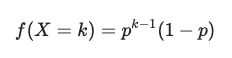


In [22]:
# Example 2 - working
var = torch.Tensor(3,3,2).geometric_(0.1)
var

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 2.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In example 2, we created a tensor with 3 dimensions with the probability set to 0.1

In [23]:
# Example 3 - breaking (to illustrate when it breaks)
var = torch.Tensor(3,3,2).geometric_(2.4)
var

RuntimeError: geometric_ expects p to be in (0, 1), but got p=2.4

Same example is being used from example 2. This time we tried to break the code by putting in a probabilistic value that is greater than 1. We got a RuntimeError because probability is always within the range (0,1). Probability is bever greater than 100, hence the code did not work

## Function 5 - torch.tensor.log_normal_()

Formal Definition : Lognormal distribution is a continuous probabilistic distribution of a random variable whose logarithm is normally distrbuted. So, if a variable X is log-normally distributed, the Y = log(X) has a nornal distribution.
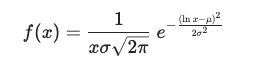

Mathematical definition : https://mathworld.wolfram.com/LogNormalDistribution.html

Explanation : The log-normal distribution is the probability distribution of a random variable whose logarithm follows a normal distribution. It models phenomena whose relative growth rate is independent of size, which is true of most natural phenomena including the size of tissue and blood pressure, income distribution, and even the length of chess games.

In [1]:
# Example 1 - working
import torch
var = torch.Tensor(2,3).log_normal_(mean = 3, std = 4, generator = None)
var

tensor([[  10.6182,   11.2088,    3.0453],
        [1872.3538, 2170.0347,   15.1384]])

In the above example, we create a Tensor with 2 columns and 3 rows with the log normal distribution. Here, the distribution function itself takes in two parameters; mean and standard deviation. Each random element in the Tensor will be passed into the normal distribution sample and computed for a log normal distribution as per the formula in the introduction. 

In [10]:
# Example 2 - working
#var = torch.Tensor([[1,2,3], [4,5,6]])
sample = torch.Tensor(6,9).log_normal_(mean = 20, std = 3)
sample

tensor([[2.5118e+07, 9.9392e+06, 4.6896e+07, 2.4135e+08, 1.4839e+09, 1.1571e+10,
         7.5695e+05, 1.0684e+11, 4.3572e+09],
        [2.3158e+09, 8.9958e+08, 3.6649e+09, 3.2194e+11, 3.5958e+07, 1.6201e+08,
         5.7553e+07, 1.5329e+10, 3.8494e+07],
        [7.4035e+08, 1.7455e+08, 2.9421e+08, 5.1662e+08, 1.4577e+08, 7.8826e+09,
         8.6048e+09, 2.1665e+07, 4.6394e+08],
        [3.1268e+06, 1.0006e+09, 3.8396e+10, 3.9422e+10, 9.6389e+07, 6.8669e+07,
         5.1719e+09, 5.0927e+09, 1.4440e+09],
        [3.3573e+07, 2.3888e+08, 1.5435e+07, 3.1746e+09, 1.7063e+09, 2.5437e+06,
         1.1832e+09, 3.2230e+09, 3.1358e+07],
        [2.1640e+10, 5.6778e+10, 7.0112e+05, 4.1133e+08, 4.2252e+10, 5.3675e+06,
         2.3047e+08, 4.0432e+07, 3.1704e+07]])

The above example is similar to example 1, except for extreme output eneration.

In [11]:
# Example 3 - breaking (to illustrate when it breaks)
sample = torch.Tensor(6,9).log_normal_(mean = 20, std = - 3)
sample

RuntimeError: log_normal_ expects std > 0.0, but found std=-3

Same code is being used in example 3 as example 2. The only operation not allowed here is a negative mean or standard deviation. Hence, when entered a negative value, the code breaks.

## Conclusion

We discussed in this post about how to create a Tensor and how a tensor can be used in different probabilistic distributions go generate complex results. With this intro, we are now ready to build our own Machine Learning model using a Tensor. 

## Reference Links
Provide links to your references and other interesting articles about tensors
* Official documentation for `torch.Tensor`: https://pytorch.org/docs/stable/tensors.html
* https://brilliant.org/wiki/log-normal-distribution/
* https://brilliant.org/wiki/bernoulli-distribution/

In [12]:
!pip install jovian --upgrade --quiet

In [13]:
import jovian

In [14]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "smitj23/01-tensor-operations" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/smitj23/01-tensor-operations


'https://jovian.ml/smitj23/01-tensor-operations'